Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


**Мягкий дедлайн:** 6 ноября 23:59

**Жесткий дедлайн:** 13 ноября 23:59

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [0]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [0]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [0]:
age_categories = [age_category(age) for age in data.Age]

In [0]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [0]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- **577 мужчин и 314 женщин**

In [25]:
# Ваш код здесь
a=data.groupby('Sex').size()
print("{} мужчин и {} женщин".format(a['male'], a['female']))

577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- **108**
- 112
- 125

In [279]:
# Ваш код здесь
print('Распределение переменной Pclass')
print(data.groupby(['Pclass']).size())

print()
print('Распределение переменной Pclass для мужчин')
print(data[(data['Sex']=='male')].groupby(['Pclass']).size())

print()
print('Распределение переменной Pclass для женщин')
print(data[(data['Sex']=='female')].groupby(['Pclass']).size())

a=data.groupby(['Pclass','Sex']).size()
print()
print('Мужчин 2-го класса было: {}'.format(a[2]['male']))

распределение переменной Pclass
Pclass
1    216
2    184
3    491
dtype: int64

распределение переменной Pclass для мужчин
Pclass
1    122
2    108
3    347
dtype: int64

распределение переменной Pclass для женщин
Pclass
1     94
2     76
3    144
dtype: int64

Мужчин 2-го класса было: 108


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- **Медиана – 14.45, стандартное отклонение – 49.69**
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [309]:
# Ваш код здесь
fare_med=data['Fare'].median()
fare_std=data['Fare'].std()
print('Медиана – {:.2f}, стандартное отклонение – {:.2f}'.format(fare_med,fare_std))

Медиана – 14.45, стандартное отклонение – 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- **40.6% среди молодых и 22.7% среди старых**
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [310]:
# Ваш код здесь
young=data[(data['Age']<30) & (data['Survived']==1)].size/data[(data['Age']<30)].size*100
old=data[(data['Age']>60) & (data['Survived']==1)].size/data[(data['Age']>60)].size*100

if young > old:
  print('Люди моложе 30 лет выживали чаще, чем люди старше 60 лет')

print('{:.1f}% среди молодых и {:.1f}% среди старых'.format(young,old))

Люди моложе 30 лет выживали чаще, чем люди старше 60 лет
40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- **18.9% среди мужчин и 74.2% среди женщин**

In [311]:
# Ваш код здесь
male=data[(data['Sex']=='male') & (data['Survived']==1)].size/data[(data['Sex']=='male')].size*100
female=data[(data['Sex']=='female') & (data['Survived']==1)].size/data[(data['Sex']=='female')].size*100
if female > male :
  print('Женщины выживали чаще мужчин')
print('{:.1f}% среди мужчин и {:.1f}% среди женщин'.format(male,female))

Женщины выживали чаще мужчин
18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- **William**
- John

In [308]:
# Ваш код здесь
import re
def get_male_name(name):
  l_name = re.search('(Mr.|Master.|Rev.|Don.|Dr.|Major.|Sir.|Col.|Capt.|Jonkheer.) (.+?)($|\s)', name)
  if l_name is None:
    print('не учтено имя',name)
    return ''
  else:
    return l_name.group(2)

#print('имя', get_male_name("Palsson, Master. Gosta Leonard"))
a=pd.DataFrame(data[data['Sex'] == 'male']['Name'].map(get_male_name))
res = a['Name'].value_counts().head(1).index

print('Самое популярное имя среди пассажиров Титаника мужского пола: {}'.format(res[0]))




Самое популярное имя среди пассажиров Титаника мужского пола: William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- **Да** 
- Нет

Средний возраст погибших: 30.63
Средний возраст спасенных: 28.34
Средний возраст погибших выше


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed8dac3550>,
      dtype=object)

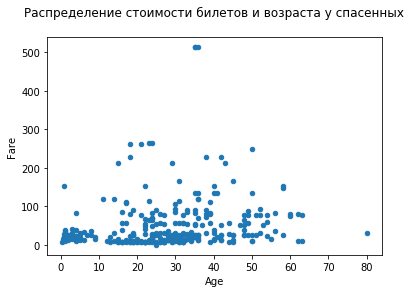

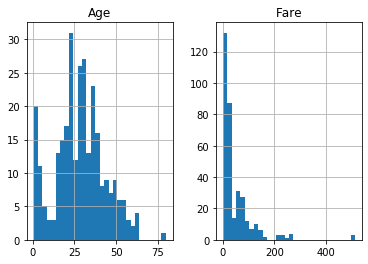

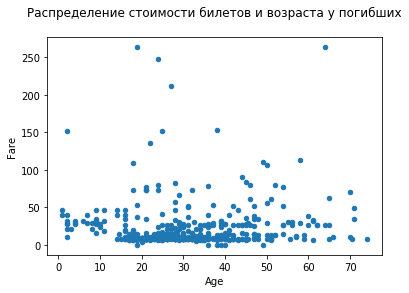

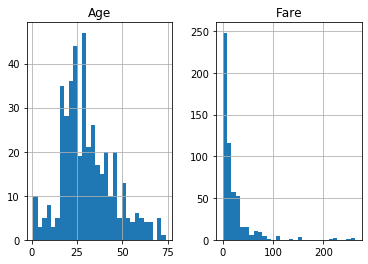

In [314]:
# Ваш код здесь
import matplotlib.pyplot as plt

age_not_surv=data[(data['Survived']==0)][['Age']].mean()
age_surv=data[(data['Survived']==1)][['Age']].mean()

print('Средний возраст погибших: {:.2f}'.format(age_not_surv['Age']))
print('Средний возраст спасенных: {:.2f}'.format(age_surv['Age']))
if age_not_surv['Age'] > age_surv['Age']:
  print('Средний возраст погибших выше')

data[(data['Survived']==1)][['Fare','Age']].plot.scatter(x='Age', y='Fare')
plt.title('Распределение стоимости билетов и возраста у спасенных\n')
data[(data['Survived']==1)][['Fare','Age']].hist(bins=30)


data[(data['Survived']==0)][['Fare','Age']].plot.scatter(x='Age', y='Fare')
plt.title('Распределение стоимости билетов и возраста у погибших\n')
data[(data['Survived']==0)][['Fare','Age']].hist(bins=30)



**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- **В среднем мужчины 1-го класса старше 40 лет**
- В среднем женщины 1-го класса старше 40 лет
- **Мужчины всех классов в среднем старше женщин того же класса**
- **В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса**

In [315]:
# Ваш код здесь

mean_age_1_class=data[(data['Pclass']==1)][['Age']].mean()
mean_age_male_1_class=data[(data['Pclass']==1)&(data['Sex'] == 'male')][['Age']].mean()
mean_age_female_1_class=data[(data['Pclass']==1)&(data['Sex'] == 'female')][['Age']].mean()

mean_age_2_class=data[(data['Pclass']==2)][['Age']].mean()
mean_age_male_2_class=data[(data['Pclass']==2)&(data['Sex'] == 'male')][['Age']].mean()
mean_age_female_2_class=data[(data['Pclass']==2)&(data['Sex'] == 'female')][['Age']].mean()

mean_age_3_class=data[(data['Pclass']==3)][['Age']].mean()
mean_age_male_3_class=data[(data['Pclass']==3)&(data['Sex'] == 'male')][['Age']].mean()
mean_age_female_3_class=data[(data['Pclass']==3)&(data['Sex'] == 'female')][['Age']].mean()

mean_age_male=data[(data['Sex'] == 'male')][['Age']].mean()
mean_age_female=data[(data['Sex'] == 'female')][['Age']].mean()

if mean_age_male_1_class['Age'] > 40:
  print('В среднем мужчины 1-го класса старше 40 лет')
if mean_age_female_1_class['Age'] > 40:  
  print('В среднем женщины 1-го класса старше 40 лет')

if (mean_age_male_1_class['Age'] > mean_age_female_1_class['Age'] and 
mean_age_male_2_class['Age'] > mean_age_female_2_class['Age'] and 
mean_age_male_3_class['Age'] > mean_age_female_3_class['Age']):
    print('Мужчины всех классов в среднем старше женщин того же класса')

if (mean_age_1_class['Age']>mean_age_2_class['Age'] and
    mean_age_2_class['Age']>mean_age_3_class['Age']):
    print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса')

В среднем мужчины 1-го класса старше 40 лет
Мужчины всех классов в среднем старше женщин того же класса
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса
